In [3]:
import re
import os
import string
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  # Importing the stopwords module

from collections import Counter

import matplotlib.pyplot as plt


nltk.download('punkt')  # Download the necessary datasets
nltk.download('stopwords')
print(os.getcwd())

/Users/log/Github/IMDb-NLP


[nltk_data] Downloading package punkt to /Users/log/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/log/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def process_text_files(folder_path):
    # Loop through all the items in the directory
    for file_name in os.listdir(folder_path):
        # Check for .txt files
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            # Open the text file
            with open(file_path, 'r') as file:
                text = file.read()
            # Convert text to lowercase
            text = text.lower()
            # Remove punctuation using str.translate
            text = text.translate(str.maketrans('', '', string.punctuation))
            # Write the modified text back to the file
            with open(file_path, 'w') as file:
                file.write(text)
            print(f"Processed file: {file_name}")




In [5]:
stop_words = set(stopwords.words('english')) | {'br'} | {'like'}  # Adding 'br' to stopwords and like

pos_word_counts = Counter()
neg_word_counts = Counter()

pos_directory = './aclImdb/train/pos'
neg_directory = './aclImdb/train/neg'

In [6]:
# Function to process each file
def process_file(filepath, word_counts):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        word_counts.update(filtered_tokens)
        
# Process all files in the positive directory
for filename in os.listdir(pos_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(pos_directory, filename)
        process_file(filepath, pos_word_counts)

# Process all files in the negative directory
for filename in os.listdir(neg_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(neg_directory, filename)
        process_file(filepath, neg_word_counts)


# Assuming 'pos_word_counts' and 'neg_word_counts' have been filled with word counts
# This will trim each Counter to only have the top 7000 words
# Trim pos_word_counts
pos_top_7000 = pos_word_counts.most_common(7000)
pos_word_counts = Counter(dict(pos_top_7000))

# Trim neg_word_counts
neg_top_7000 = neg_word_counts.most_common(7000)
neg_word_counts = Counter(dict(neg_top_7000))

In [8]:
# print(neg_word_counts)

Counter({'movie': 47334, 'film': 35730, 'one': 24878, 'even': 15210, 'good': 14318, 'bad': 14164, 'would': 13692, 'really': 12426, 'time': 11562, 'see': 10756, 'dont': 10326, 'get': 9964, 'much': 9956, 'story': 9938, 'people': 9278, 'could': 9100, 'make': 9092, 'made': 8684, 'first': 8474, 'movies': 8262, 'plot': 7930, 'acting': 7866, 'way': 7616, 'well': 7608, 'characters': 7374, 'think': 7224, 'also': 7134, 'films': 6926, 'watch': 6920, 'know': 6534, 'character': 6498, 'better': 6466, 'never': 6454, 'seen': 6360, 'ever': 6340, 'little': 6136, 'two': 6084, 'say': 5894, 'nothing': 5854, 'im': 5812, 'many': 5788, 'something': 5648, 'end': 5620, 'thing': 5564, 'show': 5428, 'scenes': 5422, 'scene': 5410, 'didnt': 5320, 'go': 5242, 'doesnt': 5216, 'great': 5202, 'watching': 5182, 'worst': 4872, 'actually': 4862, 'actors': 4782, 'back': 4630, 'going': 4552, 'still': 4510, 'another': 4454, 'thats': 4450, 'cant': 4422, 'look': 4398, 'funny': 4398, 'man': 4384, 'life': 4354, 'want': 4266, 'pr

In [9]:
# print(pos_word_counts)

Counter({'film': 39184, 'movie': 36280, 'one': 26138, 'good': 14792, 'story': 12972, 'great': 12586, 'time': 11998, 'see': 11690, 'well': 11136, 'also': 11012, 'really': 10900, 'would': 10578, 'even': 9796, 'first': 9240, 'much': 9212, 'people': 8624, 'films': 8528, 'get': 8460, 'best': 8444, 'love': 8296, 'way': 7754, 'life': 7624, 'many': 7492, 'movies': 7314, 'made': 7296, 'think': 7234, 'characters': 7206, 'two': 7204, 'seen': 6698, 'little': 6640, 'watch': 6634, 'dont': 6620, 'still': 6612, 'character': 6530, 'show': 6506, 'never': 6396, 'make': 6366, 'could': 6326, 'man': 6038, 'know': 5542, 'years': 5414, 'ever': 5268, 'end': 5102, 'scene': 4928, 'back': 4890, 'real': 4868, 'new': 4854, 'though': 4810, 'say': 4768, 'makes': 4766, 'go': 4740, 'acting': 4716, 'scenes': 4704, 'better': 4628, 'plot': 4620, 'young': 4618, 'us': 4534, 'find': 4510, 'work': 4418, 'world': 4408, 'quite': 4262, 'always': 4136, 'old': 4132, 'something': 4130, 'cast': 4130, 'lot': 4120, 'another': 4076, 's

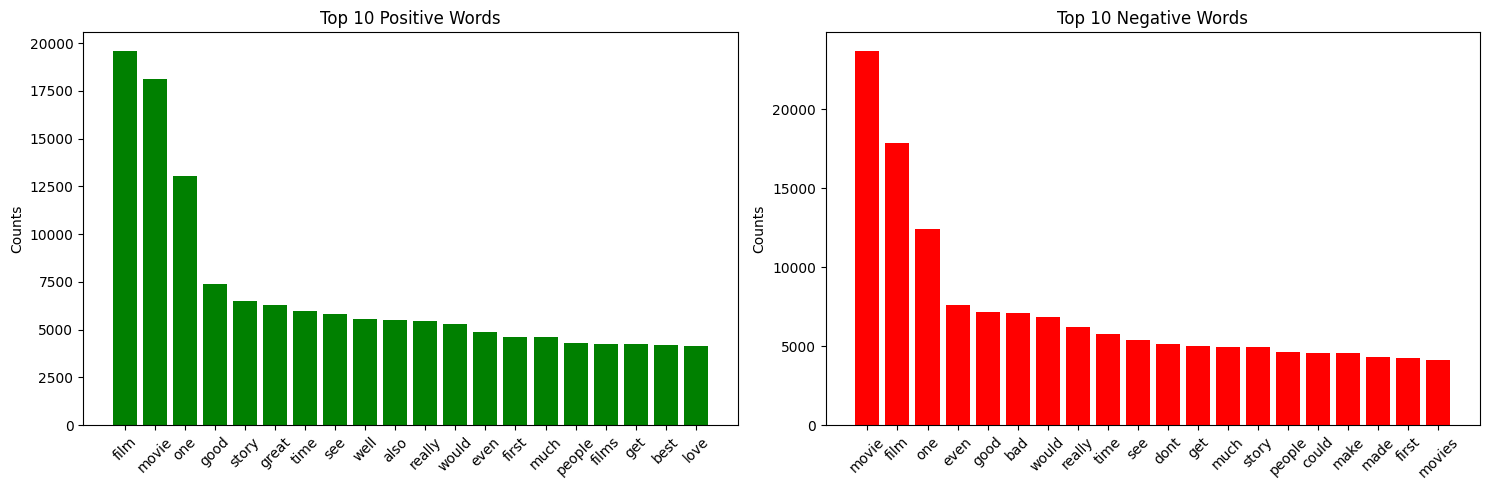

In [7]:
# Make a bar chart of common words
# Get the most common words
top_pos_words = pos_word_counts.most_common(20)
top_neg_words = neg_word_counts.most_common(20)

# Create lists of words and their counts
pos_words, pos_counts = zip(*top_pos_words)
neg_words, neg_counts = zip(*top_neg_words)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns for two bar charts

# Plot positive word counts
axs[0].bar(pos_words, pos_counts, color='green')
axs[0].set_title('Top 10 Positive Words')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=45)

# Plot negative word counts
axs[1].bar(neg_words, neg_counts, color='red')
axs[1].set_title('Top 10 Negative Words')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Top 3000 Most Common Words (minus the first 0 words)')

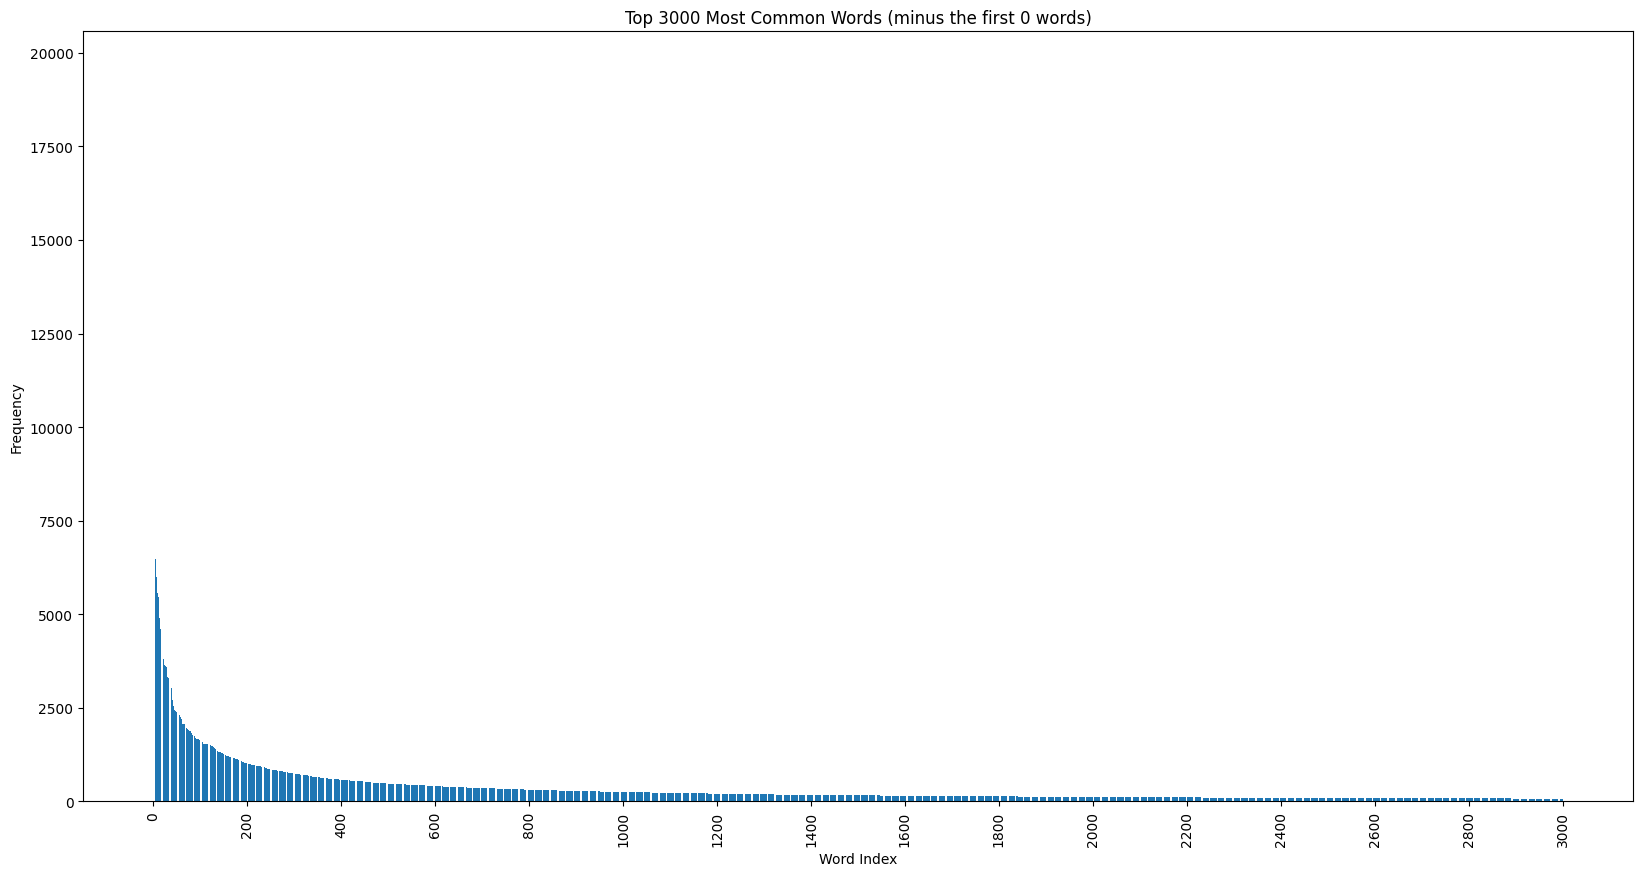

In [8]:
top_N = 3000  # The number of top words you want to show
exclude_first = 0  # The number of words to exclude from the start

# Get the most common words and their counts
top_words = pos_word_counts.most_common(top_N + exclude_first)[exclude_first:]
_, counts = zip(*top_words)  # We only need the counts, not the words themselves

# Create an index for each top word
indices = range(1, top_N + 1)

# Create the bar chart with a larger figure size
plt.figure(figsize=(20, 10))

# Plot the bars
plt.bar(indices, counts)

# Set ticks and labels
tick_interval = 200  # Adjust this value as needed
plt.xticks(range(0, top_N + 1, tick_interval), rotation='vertical')

# Set labels and title
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.title(f'Top {top_N} Most Common Words (minus the first {exclude_first} words)')

In [9]:
num_unique_pos_words = len(pos_word_counts)
num_unique_neg_words = len(neg_word_counts)

print(f"Number of unique words in positive reviews: {num_unique_pos_words}")
print(f"Number of unique words in negative reviews: {num_unique_neg_words}")


Number of unique words in positive reviews: 7000
Number of unique words in negative reviews: 7000


In [ ]:
#TO DO
# You could experiment with words that have a significantly positive and negative ratio and then only using those words to
# Right now I'm just going to go with the words that have the most differences

In [11]:
# find words more common in pos or neg
# Step 1: Combine all unique words from both counters
all_words = set(neg_word_counts.keys()) | set(pos_word_counts.keys())

# Step 2: Calculate differences and ratios
word_differences = {}
word_ratios = {}

for word in all_words:
    pos_count = pos_word_counts.get(word, 0)
    neg_count = neg_word_counts.get(word, 0)
    
    # Difference in counts
    difference = abs(pos_count - neg_count)
    word_differences[word] = difference
    
    # Ratio of counts, avoiding division by zero
    ratio = (pos_count / neg_count) if neg_count > 0 else float('inf')
    word_ratios[word] = ratio

# Step 3: Filter words by some criteria
# Example: Words significantly more common in positive reviews
polarized_words = {word: diff for word, diff in word_differences.items() if diff > 1}
sorted_polar = sorted(polarized_words.items(), key=lambda x: x[1], reverse=True)



# Printing the sorted items
# for word, diff in sorted_significant_diff:
    # print(f"{word}: {diff}")
# Or using ratios, for example, words at least twice as common in positive reviews
# significantly_positive_ratio = {word: ratio for word, ratio in word_ratios.items() if ratio >= 2}
# # for word, ration in significantly_positive_ration = {word: ratio for word, ratio in word_rations.items() if ration >= 2}
# #     print(f"{word}: {diff}")


# print(sorted_polar)
# sorted_sig_positive = sorted(significantly_positive_ratio.items(), key=lambda item: item[1], reverse=True)
# print(sorted_sig_positive)

In [12]:
import os

def read_texts_from_directory(directory_path):
    texts = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.txt'):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return texts

# Assuming you have two directories containing positive and negative reviews respectively
positive_reviews = read_texts_from_directory('./aclImdb/train/pos')
negative_reviews = read_texts_from_directory('./aclImdb/train/neg')
reviews = positive_reviews + negative_reviews

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming `polarized_words` is your dictionary of polarized words
custom_vocabulary = list(polarized_words.keys())

# Initialize CountVectorizer with your custom vocabulary
vectorizer = CountVectorizer(vocabulary=custom_vocabulary)

# Fit the vectorizer to your data and transform your text data into numerical vectors
X = vectorizer.fit_transform(reviews)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize and train your model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.858
